In [1]:
import pandas as pd

In [2]:
url='https://drive.google.com/file/d/15BGMfzCj_010sx4rbvMyrspYCtyc8y-w/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data= pd.read_csv(url)

We have imported the pandas as pd and than we have downloaded and loaded the dataset into a variable called data.

Let's see what this data file has, what kind of data it has.

In [3]:
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


We can see that we have data related to elections. We have 14 columns and 6867 rows holding data of elections that happened in past years. We will try to gain some insights on this by performing some analyses. 



Lets start by Gaining some basic info about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


We can see that we have 14 columns and 6867 rows. we can also see that we don't have null values in our data. Also, we can identify the data types of columns from this info() method. Some columns such as collection_date age has data type of object, so we will need to convert their data types. we will do it further in our project.

So, Let's start with our analysis, lets see how many samples were collected on each day.

In [5]:
data.collection_date

0       5-24-2017
1       5-24-2017
2       5-24-2017
3       5-24-2017
4       5-24-2017
          ...    
6862     6-1-2017
6863     6-1-2017
6864     6-1-2017
6865     6-1-2017
6866     6-1-2017
Name: collection_date, Length: 6867, dtype: object

Here we can see that the data type of this is object and not date, we will convert it to date first so that we can perform more analysis related to date.

In [6]:
data['collection_date']= pd.to_datetime(data.collection_date)

In [7]:
data.collection_date

0      2017-05-24
1      2017-05-24
2      2017-05-24
3      2017-05-24
4      2017-05-24
          ...    
6862   2017-06-01
6863   2017-06-01
6864   2017-06-01
6865   2017-06-01
6866   2017-06-01
Name: collection_date, Length: 6867, dtype: datetime64[ns]

we can see that now the data type has changed to datetime64. Now we can also perform date operations if needed.

Lets see if we can extract month from the collection_date. 

In [8]:
month=pd.DatetimeIndex(data.collection_date).month

In [9]:
month.unique()

Int64Index([5, 6], dtype='int64', name='collection_date')

lets add this month column to the orignal data we have.

In [10]:
data['Month']=pd.DatetimeIndex(data.collection_date).month

let's see the data now

In [11]:
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,5
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,6
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,6


We can see that the month column has added successfully to our dataframe. 


lets see how many samples were collected on each day and then we will see the collection by each month. We can use the value counts function for this. Let's see how many unique values does the collection date holds.


In [12]:
data.collection_date.unique()

array(['2017-05-24T00:00:00.000000000', '2017-05-25T00:00:00.000000000',
       '2017-05-26T00:00:00.000000000', '2017-05-27T00:00:00.000000000',
       '2017-05-28T00:00:00.000000000', '2017-05-29T00:00:00.000000000',
       '2017-05-30T00:00:00.000000000', '2017-05-31T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

Lets see how many values does each date has.

In [13]:
datevalues=data['collection_date'].value_counts()
datevalues

2017-05-24    1479
2017-05-25     998
2017-05-28     761
2017-05-27     665
2017-05-29     620
2017-06-01     607
2017-05-26     598
2017-05-30     582
2017-05-31     557
Name: collection_date, dtype: int64

We can convey that the highest number of samples were collected on '2017-05-24'

lets plot this with a graph

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

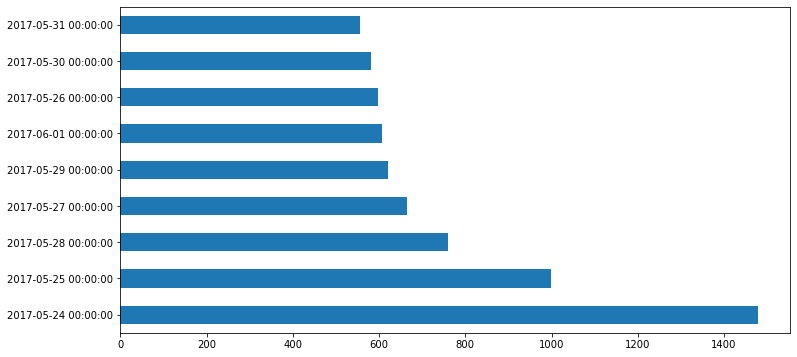

In [15]:
plt.figure(figsize=(12,6))
datevalues.plot(kind='barh')

let's see the value_count in months.


In [16]:
data['Month'].value_counts()


5    6260
6     607
Name: Month, dtype: int64

Now, let's see that what proportion of the total respondents were aged less than 45


In [17]:
data.age

0       26
1       34
2       25
3       36
4       22
        ..
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6867, dtype: object

Here, we can see that the age column has the data type object and not integer. So, lets convert the data type of this age column first and then perform the other operations. Also, let us identify why the data type is not recognized as int. 

In [18]:
data.age.unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

Here we can see a value '24ko' which is not integer type, that is why the whole column does not have a data type of int. We will replace this '24ko' with the value '24'. Now, we will firstly see how much of the data has the age value '24ko'.


The '24ko' has only 1 value. Let's replace it with '24'.


In [19]:
data.age.replace({'24ko':24}, inplace =True)

In [20]:
data.age.unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', 24, '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

The Value we had '24ko' has been now replaced with the value '24'. lets again see the value count. Also notice that the dtype is still object so we also need to change it.


In [21]:
data.age.value_counts()

25    598
24    449
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
41     54
44     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
53     12
61     12
54     11
57     10
56      9
58      9
64      8
67      7
62      5
59      5
65      5
68      4
63      4
66      4
70      3
71      2
74      1
24      1
69      1
99      1
72      1
75      1
76      1
Name: age, dtype: int64

We can see that the value 24 repeats two times. The first one holds 449 values and the second one has one value. Once we change the data type to int, there will be no repeating value '24'. 

In [22]:
data['age']=data.age.astype(int)

In [23]:
data.age

0       26
1       34
2       25
3       36
4       22
        ..
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6867, dtype: int64

In [24]:
data.age.dtype

dtype('int64')

we can see that we have successfully changed the data type to int. Now we can perform the analysis that that how many respondents out of the total respondents were below the age 45.

In [25]:
data.age.value_counts()

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
59      5
65      5
62      5
66      4
68      4
63      4
70      3
71      2
74      1
69      1
99      1
72      1
75      1
76      1
Name: age, dtype: int64

Here we can see that for the age '24' we were getting two values but now we have only one age value 24 with the count of 450.

Lets find the respondents with age less than 45

In [26]:
data.loc[(data.age<45)]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,5
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,6
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,6


We got 6399 rows which has the age less than 45. Now we will take out the percent and see what percent out of the total are the respondents with age less than 45.

In [27]:
data.count(0)

response_id         6867
collection_date     6867
urban_rural         6867
education           6867
income              6867
Vote_Now            6867
Past_Vote           6867
CM_satisfaction     6867
MLA_satisfaction    6867
age                 6867
gender              6867
assembly_no         6867
category            6867
weight              6867
Month               6867
dtype: int64

we can see that in total we have 6867 respondents and out of which 6399 repsondents have age less than 45.

In [28]:
(6399/6867)*100

93.18479685452162

we got 93.2 %. This means 93.2% of the respondents have age less than 45.

Now, lets divide the age into age groups. Lets define four age groups 18-25, 25-40, 40-55 and 55+ . Firstly lets make a copy of the data so that we don't misplace it. 

In [29]:
data_copy = data.copy()

In [30]:
data_copy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,5
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,6
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,6


Let's start this by inserting a new column next to the age column and we will have groups in that age_group column.

In [31]:
data_copy.insert(10, 'Age_Group', data_copy.age)

What we have done in the above code is we have inserted a column next to the age column. Theres an insert method through which we can do this. In the first argument you need to enter the column position. The second argument will hold the name of the column, and lastly the third argument will hold the data which we want in that column.

In [32]:
data_copy

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298,5
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,25,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,30,Male,169,BC,0.252780,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,20,Male,241,Gen,1.812926,6
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,23,Male,243,Gen,0.080137,6


In [33]:
data1825=data_copy.loc[(data.age >= 18) & (data.age < 25)]

In [34]:
data1825

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,23,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,24,Male,199,Gen,0.226477,5
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,24,Male,194,BC,0.769738,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,23,Male,188,BC,0.040519,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6859,2017-06-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,24,Male,241,Gen,1.812926,6
6859,6860,2017-06-01,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",Left Front,Did not vote,Fully Dissatisfied,Somewhat Satisfied,21,21,Male,146,EBC,1.558234,6
6861,6862,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",BJP,BJP,Fully Dissatisfied,Somewhat Satisfied,22,22,Male,166,Gen,0.080137,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,20,Male,241,Gen,1.812926,6


we can see here that in this dataframe we only have the data of respondents between the age 18 and 25. Now here in the age_group we will assign the value '18-25' and we will repeat this for 25-40, 40-55 and 55+

In [35]:
data1825['Age_Group'] = '18-25'

/tmp/ipykernel_40/109306207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1825['Age_Group'] = '18-25'


Let's see whether it has reflected or not

In [36]:
data1825

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6859,2017-06-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,18-25,Male,241,Gen,1.812926,6
6859,6860,2017-06-01,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",Left Front,Did not vote,Fully Dissatisfied,Somewhat Satisfied,21,18-25,Male,146,EBC,1.558234,6
6861,6862,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",BJP,BJP,Fully Dissatisfied,Somewhat Satisfied,22,18-25,Male,166,Gen,0.080137,6
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,18-25,Male,241,Gen,1.812926,6


we can see it has been reflected in the dataframe and we will do this same for the other three age groups.

In [37]:
data2540=data_copy.loc[(data_copy.age >=25) & (data_copy.age < 40) ]

In [38]:
data2540

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298,5
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,38,Male,178,Gen,0.382603,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,2017-06-01,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,30,Male,241,EBC,0.174156,6
6860,6861,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,25,Male,145,BC,0.528469,6
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,25,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,30,Male,169,BC,0.252780,6


In [39]:
data2540['Age_Group'] = '25-40'

/tmp/ipykernel_40/3422995920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2540['Age_Group'] = '25-40'


In [40]:
data2540

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969,5
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419,5
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25-40,Male,191,Gen,0.673762,5
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,25-40,Male,194,Gen,1.101298,5
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,25-40,Male,178,Gen,0.382603,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,2017-06-01,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,25-40,Male,241,EBC,0.174156,6
6860,6861,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,25-40,Male,145,BC,0.528469,6
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,25-40,Male,166,Gen,0.036329,6
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,25-40,Male,169,BC,0.252780,6


In [41]:
data4055=data_copy.loc[(data_copy.age >= 40) & (data_copy.age < 55)]

In [42]:
data4055['Age_Group'] = '40-55'

/tmp/ipykernel_40/2280068609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4055['Age_Group'] = '40-55'


In [43]:
data4055

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
11,12,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",LJP,JD(U),Somewhat Satisfied,Fully Dissatisfied,42,40-55,Male,183,BC,2.824391,5
12,13,2017-05-24,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",Undecided,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,51,40-55,Male,183,SC,20.558759,5
28,29,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,40-55,Male,205,BC,1.337935,5
30,31,2017-05-24,Urban,Graduate,"₹ 30,000 - ₹ 50,000",NOTA,NOTA,Fully Dissatisfied,Fully Dissatisfied,44,40-55,Male,183,Gen,1.344773,5
33,34,2017-05-24,Urban,Graduate,"₹ 50,000 - ₹ 80,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,53,40-55,Male,188,Gen,1.936195,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,6817,2017-06-01,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,40,40-55,Male,167,Gen,0.183806,6
6819,6820,2017-06-01,Urban,12th Pass,"BPL/Below ₹ 5,000",Undecided,BJP,Somewhat Satisfied,Fully Dissatisfied,40,40-55,Male,168,Gen,0.183806,6
6829,6830,2017-06-01,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,40-55,Male,146,EBC,6.328899,6
6840,6841,2017-06-01,Rural,Graduate,"₹ 1,50,000 & above",NOTA,BJP,Fully Dissatisfied,Somewhat Satisfied,45,40-55,Male,241,BC,1.425852,6


In [44]:
data55=data_copy.loc[(data_copy.age >= 55)]

In [45]:
data55

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
69,70,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,74,Male,192,ST,1.805903,5
74,75,2017-05-24,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,70,Male,183,BC,0.343147,5
121,122,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,58,Male,187,Gen,2.092567,5
126,127,2017-05-24,Urban,Graduate,"₹ 80,000 - ₹ 1,50,000",NOTA,BJP,Fully Dissatisfied,Fully Dissatisfied,56,56,Male,183,Gen,2.092567,5
183,184,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55,Male,175,BC,2.824391,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,2017-05-30,Urban,Graduate,"₹ 30,000 - ₹ 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55,Male,146,Gen,3.090009,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,68,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,76,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,60,Male,144,SC,4.741094,6


In [46]:
data55['Age_Group']='55+'

/tmp/ipykernel_40/3228068502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data55['Age_Group']='55+'


In [47]:
data55

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
69,70,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,55+,Male,192,ST,1.805903,5
74,75,2017-05-24,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,55+,Male,183,BC,0.343147,5
121,122,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,55+,Male,187,Gen,2.092567,5
126,127,2017-05-24,Urban,Graduate,"₹ 80,000 - ₹ 1,50,000",NOTA,BJP,Fully Dissatisfied,Fully Dissatisfied,56,55+,Male,183,Gen,2.092567,5
183,184,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,175,BC,2.824391,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,2017-05-30,Urban,Graduate,"₹ 30,000 - ₹ 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


In [48]:
data1825.age.unique()

array([22, 23, 24, 19, 21, 18, 20])

In [49]:
data2540.age.unique()

array([26, 34, 25, 36, 38, 29, 30, 39, 37, 32, 27, 28, 35, 31, 33])

In [50]:
data4055.age.unique()

array([42, 51, 44, 53, 48, 45, 40, 49, 46, 43, 41, 50, 54, 47, 52])

In [51]:
data55.age.unique()

array([74, 70, 58, 56, 55, 62, 60, 59, 61, 66, 57, 67, 65, 71, 63, 64, 68,
       69, 99, 72, 75, 76])

Now we will concatenate all the above dataframe and we will have the column which we wanted with all the other data.

In [52]:
pd.concat([data1825,data2540,data4055,data55])

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,2017-05-30,Urban,Graduate,"₹ 30,000 - ₹ 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


we can see that the number of rows is same when we loaded the data and the new column age_group is also added with relevant values. Lets save this data the orignal data frame.

In [53]:
data= pd.concat([data1825,data2540,data4055,data55])

In [54]:
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,2017-05-30,Urban,Graduate,"₹ 30,000 - ₹ 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


In [55]:
data.Age_Group.unique()

array(['18-25', '25-40', '40-55', '55+'], dtype=object)

Let's plot a graph between the age_group and number of respondents.

<AxesSubplot:>

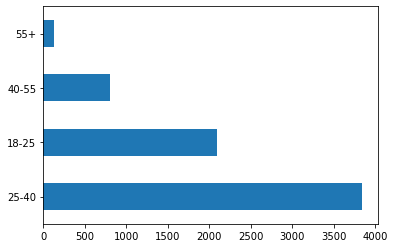

In [56]:
data.Age_Group.value_counts().plot(kind='barh')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='age'>

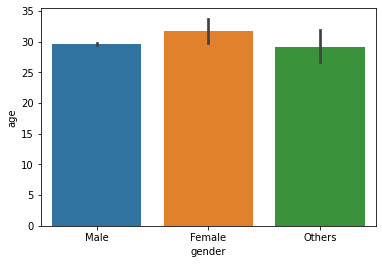

In [57]:
sns.barplot('gender', 'age',data=data)

In [58]:
urbanrural=data.urban_rural.value_counts()

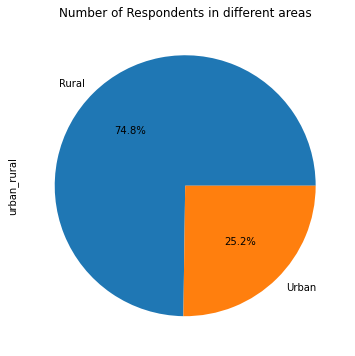

In [59]:
plt.figure(figsize=(12,6))
urbanrural.plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of Respondents in different areas');

In the above pie chart we can see that 1/3 rd of the respondents comes from rural areas and rest of them from the urban areas.

Let's see how many samples were collected for each age group and which age group had the most samples

In [60]:
data.Age_Group.value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: Age_Group, dtype: int64

We can say that the maximum of the respondents were of the age between 25-40

Lets's analyse how many of the respondents voted for 'BJP' in both vote now and past vote


In [61]:
databjp=data.loc[(data.Vote_Now == 'BJP') & (data.Past_Vote == 'BJP')]
databjp

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
49,50,2017-05-24,Rural,Graduate,"₹ 80,000 - ₹ 1,50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,24,18-25,Male,198,Gen,0.226477,5
55,56,2017-05-24,Rural,Graduate,"BPL/Below ₹ 5,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,21,18-25,Male,199,Gen,0.226477,5
103,104,2017-05-24,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Can’t say,23,18-25,Male,206,BC,0.046903,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,6514,2017-05-28,Urban,Post - Graduation,"₹ 10,000 - ₹ 20,000",BJP,BJP,Fully Satisfied,Somewhat Satisfied,62,55+,Male,168,Gen,0.300990,5
6550,6551,2017-05-29,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,55,55+,Male,164,Gen,0.945107,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5


In [62]:
1630/6867 *100

23.736711810106307

Out of the total 6867 respondents 1630 respondents have voted 'BJP' in both vote_now and past_vote. So the percentage of voters voting for 'BJP' in past vote and now is 23.7%

Let's see what age_group has voted the most in the past and now.

In [63]:
databjp.Age_Group.value_counts()

25-40    965
18-25    340
40-55    269
55+       56
Name: Age_Group, dtype: int64

Mostly 25-40 years of respondents have voted mostly. Also, lets see what areas whether urban or rural has voted the most in the past and present.

In [64]:
databjp.urban_rural.value_counts()

Rural    1122
Urban     508
Name: urban_rural, dtype: int64

In [65]:
databjp.category.value_counts()

Gen    1043
BC      289
EBC     249
SC       37
ST       12
Name: category, dtype: int64

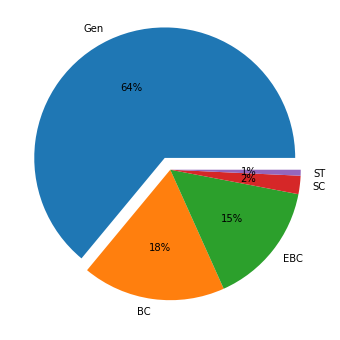

In [66]:
plt.figure(figsize=(12,6))
explode = [0.1, 0, 0, 0, 0]
plt.pie( databjp.category.value_counts().values,labels=databjp.category.value_counts().index, autopct='%.0f%%', explode=explode);

We can see that 64% of the voter in the past and now belongs to Genral category

In [67]:
datapastbjp=data.loc[(data.Past_Vote == 'BJP')]
datapastbjp

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
24,25,2017-05-24,Rural,12th Pass,"₹ 50,000 - ₹ 80,000",Others,BJP,Fully Dissatisfied,Can’t say,19,18-25,Male,193,Gen,0.247091,5
45,46,2017-05-24,Rural,Graduate,"BPL/Below ₹ 5,000",Plurals,BJP,Somewhat Satisfied,Fully Dissatisfied,18,18-25,Male,209,BC,0.428512,5
48,49,2017-05-24,Urban,Graduate,"₹ 30,000 - ₹ 50,000",NOTA,BJP,Somewhat Satisfied,Somewhat Dissatisfied,20,18-25,Male,184,BC,0.157984,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,6551,2017-05-29,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,55,55+,Male,164,Gen,0.945107,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


In datapastbjp data frame we have the data of the respondents who had voted for 'BJP' in the past. Let's analyze how much of the respondents were fully satisfied, somewhat satisfied or somewhat dissatisfied.

In [68]:
datapastbjp.CM_satisfaction.value_counts()

Fully Dissatisfied       1076
Somewhat Satisfied       1026
Fully Satisfied           342
Somewhat Dissatisfied     285
Can’t say                  94
Name: CM_satisfaction, dtype: int64

<AxesSubplot:ylabel='CM_satisfaction'>

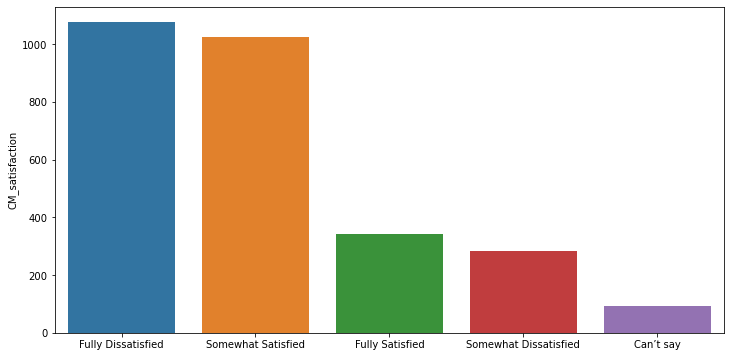

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x=datapastbjp.CM_satisfaction.value_counts().index, y=datapastbjp.CM_satisfaction.value_counts())

In [70]:
databjp

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
49,50,2017-05-24,Rural,Graduate,"₹ 80,000 - ₹ 1,50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,24,18-25,Male,198,Gen,0.226477,5
55,56,2017-05-24,Rural,Graduate,"BPL/Below ₹ 5,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,21,18-25,Male,199,Gen,0.226477,5
103,104,2017-05-24,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Can’t say,23,18-25,Male,206,BC,0.046903,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,6514,2017-05-28,Urban,Post - Graduation,"₹ 10,000 - ₹ 20,000",BJP,BJP,Fully Satisfied,Somewhat Satisfied,62,55+,Male,168,Gen,0.300990,5
6550,6551,2017-05-29,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,55,55+,Male,164,Gen,0.945107,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5


Let's see for each day of sample collection the proportion of respondents who were fully satisfied with the performance of the CM.

In [71]:
fullysatisfiedcm=data.loc[(data.CM_satisfaction == 'Fully Satisfied')]
fullysatisfiedcm

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
75,76,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JD(U),VIP,Fully Satisfied,Fully Satisfied,18,18-25,Male,175,BC,0.333505,5
90,91,2017-05-24,Rural,Graduate,"₹ 80,000 - ₹ 1,50,000",JD(U),Did not vote,Fully Satisfied,Can’t say,22,18-25,Male,171,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,6499,2017-05-28,Urban,Post - Graduation,"₹ 10,000 - ₹ 20,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,61,55+,Male,168,Gen,0.300990,5
6499,6500,2017-05-28,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,241,Gen,3.968010,5
6513,6514,2017-05-28,Urban,Post - Graduation,"₹ 10,000 - ₹ 20,000",BJP,BJP,Fully Satisfied,Somewhat Satisfied,62,55+,Male,168,Gen,0.300990,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


Let's first take out how many responses were there on each day.

In [72]:
datacollectiondate=data.collection_date.value_counts()
datacollectiondate

2017-05-24    1479
2017-05-25     998
2017-05-28     761
2017-05-27     665
2017-05-29     620
2017-06-01     607
2017-05-26     598
2017-05-30     582
2017-05-31     557
Name: collection_date, dtype: int64

Now from the data frame 'fullysatisfiedcm' which only has the data about the fully satisfied cm satisfaction we will find out the number of responses for each day in that data frame and than we will divide that with the total number of responses on that day.


In [73]:
fullysatisfiedcm.collection_date.value_counts()

2017-05-24    146
2017-05-25     95
2017-05-28     92
2017-06-01     75
2017-05-29     73
2017-05-30     65
2017-05-31     62
2017-05-26     59
2017-05-27     54
Name: collection_date, dtype: int64

In [74]:
(fullysatisfiedcm.collection_date.value_counts()/data.collection_date.value_counts())*100

2017-05-24     9.871535
2017-05-25     9.519038
2017-05-26     9.866221
2017-05-27     8.120301
2017-05-28    12.089356
2017-05-29    11.774194
2017-05-30    11.168385
2017-05-31    11.131059
2017-06-01    12.355848
Freq: D, Name: collection_date, dtype: float64

We have got the percent count that on which day how many respondents voted for the cm satisfaction as fully satisfied.

 Let's create a day-wise proportion of respondents that opted fully dissatisfied with their MLA and also we will create a line plot of the result with date on x-axis and proportions on the y-axis.

In [75]:
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,2017-05-30,Urban,Graduate,"₹ 30,000 - ₹ 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009,5
6702,6703,2017-05-31,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519,5
6720,6721,2017-05-31,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906,5
6787,6788,2017-06-01,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094,6


In [76]:
mladis=data.loc[(data.MLA_satisfaction == 'Fully Dissatisfied')]
mladis

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477,5
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477,5
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519,5
45,46,2017-05-24,Rural,Graduate,"BPL/Below ₹ 5,000",Plurals,BJP,Somewhat Satisfied,Fully Dissatisfied,18,18-25,Male,209,BC,0.428512,5
47,48,2017-05-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,20,18-25,Male,172,BC,1.188838,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,6380,2017-05-27,Rural,Post - Graduation,"BPL/Below ₹ 5,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,55,55+,Male,167,Gen,1.535906,5
6499,6500,2017-05-28,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,241,Gen,3.968010,5
6550,6551,2017-05-29,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,55,55+,Male,164,Gen,0.945107,5
6579,6580,2017-05-29,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,JD(U),Fully Dissatisfied,Fully Dissatisfied,67,55+,Male,141,SC,5.308107,5


let's see for each date how many respondents responded with fully dissatisfied.

In [77]:
mladis.collection_date.value_counts()

2017-05-24    887
2017-05-25    630
2017-05-28    462
2017-05-27    403
2017-06-01    385
2017-05-30    361
2017-05-26    353
2017-05-29    350
2017-05-31    321
Name: collection_date, dtype: int64

And for finding out the proportion we need to have the total responses on each date.

In [78]:
data.collection_date.value_counts()

2017-05-24    1479
2017-05-25     998
2017-05-28     761
2017-05-27     665
2017-05-29     620
2017-06-01     607
2017-05-26     598
2017-05-30     582
2017-05-31     557
Name: collection_date, dtype: int64

For finding out the proportion we will divide the above both values and lets see what we get

In [79]:
mlapercentdis=(mladis.collection_date.value_counts()/data.collection_date.value_counts())*100
mlapercentdis

2017-05-24    59.972955
2017-05-25    63.126253
2017-05-26    59.030100
2017-05-27    60.601504
2017-05-28    60.709593
2017-05-29    56.451613
2017-05-30    62.027491
2017-05-31    57.630162
2017-06-01    63.426689
Freq: D, Name: collection_date, dtype: float64

Let's Plot a line plot on this with date on x axis and percent values on y

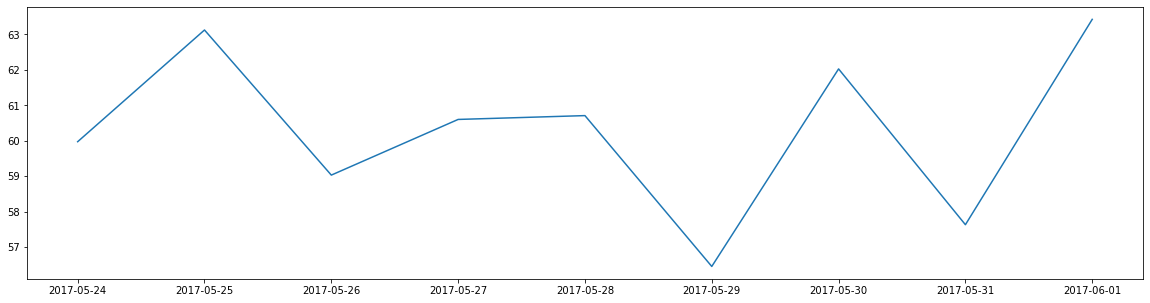

In [80]:
plt.figure(figsize=(20,5))
plt.plot(mlapercentdis.index,mlapercentdis.values)

lets create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.


In [81]:
data.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'response_id', aggfunc = 'count')


Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


Lets do the pivot thing again with cell values as the sum of weights

In [85]:
data.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'weight', aggfunc = 'sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


Let's create a group by statement using the age_group column and lets find out the counts.


In [91]:
d1=data.groupby('Age_Group').count()
d1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Month
Age_Group,,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801,801
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


 let's create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [93]:
d2=data.loc[(data.Vote_Now) == 'JD(U)']


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,Age_Group,gender,assembly_no,category,weight,Month
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505,5
67,68,2017-05-24,Urban,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),Did not vote,Somewhat Satisfied,Fully Dissatisfied,24,18-25,Male,184,SC,2.427588,5
75,76,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JD(U),VIP,Fully Satisfied,Fully Satisfied,18,18-25,Male,175,BC,0.333505,5
90,91,2017-05-24,Rural,Graduate,"₹ 80,000 - ₹ 1,50,000",JD(U),Did not vote,Fully Satisfied,Can’t say,22,18-25,Male,171,BC,0.333505,5
102,103,2017-05-24,Rural,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),JD(U),Fully Satisfied,Somewhat Dissatisfied,20,18-25,Male,173,BC,0.333505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,5249,2017-05-24,Urban,Post - Graduation,"₹ 50,000 - ₹ 80,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,63,55+,Male,62,Gen,4.730010,5
5956,5957,2017-06-01,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,57,55+,Male,156,Gen,2.359308,6
6341,6342,2017-05-26,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",JD(U),INC,Fully Satisfied,Somewhat Dissatisfied,70,55+,Male,142,BC,1.495606,5
6499,6500,2017-05-28,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,241,Gen,3.968010,5


In [97]:
d3=d2.groupby('Age_Group').count()
d3

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Month
Age_Group,,,,,,,,,,,,,,,
18-25,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


Let's Join/Merge the two dataframes d1 and d3 with the common column as age_group


In [98]:
pd.merge(d1,d3,on='Age_Group')

,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,...,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y,Month_y
Age_Group,,,,,,,,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,181,181,181,181,181,181,181,181,181,181
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,264,264,264,264,264,264,264,264,264,264
40-55,801,801,801,801,801,801,801,801,801,801,...,68,68,68,68,68,68,68,68,68,68
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13


In [99]:
import jovian

In [100]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "armanmardhani16/untitled-dd262" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/armanmardhani16/untitled-dd262


'https://jovian.ai/armanmardhani16/untitled-dd262'